# CREDITO EN EL SECTOR ASEGURADOR

**OBJETIVO DE ESTE ANÁLISIS**

Evaluar el desempeño y la calidad del portafolio de crédito mediante el análisis de la emisión de créditos y la ocurrencia de siniestros, con el fin de identificar patrones de riesgo, niveles de siniestralidad y oportunidades de mejora en la gestión del portafolio.

**PASO A PASO:**

* Analizar la composición del portafolio de créditos emitidos, identificando su distribución por año, país, tipo de crédito, moneda, plazo y tipo de póliza.

* Evaluar el comportamiento de los siniestros, analizando su frecuencia, severidad, tipos de insolvencia y montos recuperados.

* Medir la siniestralidad del portafolio, comparando los montos emitidos contra los montos siniestrados y recuperados.

* Identificar segmentos de mayor riesgo, como países, tipos de crédito o plazos que presentan mayor probabilidad de siniestro o mayores pérdidas económicas.

* Analizar la efectividad de la recuperación y del reaseguro, evaluando su impacto en la reducción de pérdidas financieras.

* Generar insights accionables, que permitan proponer recomendaciones orientadas a mejorar la calidad del portafolio y apoyar la toma de decisiones.

---

**DESCRIPCIÓN DE LOS DATOS**


**Tabla c_emision:**


**anio:** Indica el año en el que se registró la emisión del crédito o póliza. Los datos abarcan del año 2015 al 2024.

**plazo:** Representa la duración del crédito asociado a la emisión (expresado en días).

**pais:** Señala el país asociado al crédito emitido. Incluye tanto operaciones internas como créditos vinculados a países extranjeros.

**tipo_credito:** Clasifica el crédito según su naturaleza. Incluye créditos internos, de exportación y mixtos, así como registros sin información disponible.

**giro:** Describe la actividad económica del acreditado. Destacando principalmente actividades industriales, manufactureras y comerciales.

**tipo_poliza:** Identifica el tipo de póliza bajo la cual se emitió el crédito. Incluye pólizas globales, específicas y registros sin información disponible.

**moneda:** Especifica la moneda en la que está denominado el crédito. Distingue entre moneda nacional y extranjera.

**forma_venta:** Indica el canal a través del cual se colocó el crédito, como agentes (persona física o moral), fuerza de venta interna, red de sucursales bancarias o venta directa.

**numero_polizas:** Señala la cantidad de pólizas asociadas a cada registro de emisión.

**prima_emitida:** Representa el monto total de la prima emitida por la aseguradora al momento de la emisión del crédito. Incluye posibles ajustes o cancelaciones, reflejados en valores negativos.

**prima_retenida:** Indica la parte de la prima emitida que es retenida por la aseguradora después de considerar cesiones u otros esquemas. Su comportamiento es consistente con la prima emitida.

**prima_devengada:** Corresponde a la porción de la prima que ha sido devengada en el tiempo, es decir, reconocida conforme transcurre la vigencia del crédito.

**suma_asegurada:** Representa el monto total del riesgo cubierto por la póliza. 

**comision_directa:** Indica el monto de la comisión pagada directamente por la emisión del crédito, generalmente asociada a intermediarios o canales de venta. 

---

**Tabla c_siniestros:**


**anio:** Indica el año en el que se registró el siniestro. Los datos abarcan el periodo de 2015 a 2024.

**plazo:** Representa la duración del crédito asociado al siniestro (expresada en días).

**tipo_insolvencia:** Clasifica el tipo de incumplimiento que originó el siniestro, como mora prolongada, insolvencia de hecho o insolvencia legal.

**entidad:** Indica la entidad federativa asociada al crédito. Incluye estados específicos de México y la categoría “No aplica (Exportación)”.

**pais:** Representa el país relacionado con el crédito. Incluye registros internos y países extranjeros.

**tipo_credito:** Clasifica el crédito según su naturaleza, como interno, exportación o mixto.

**giro:** Describe la actividad económica del acreditado. Incluye distintos sectores industriales y comerciales.

**tipo_poliza:** Identifica el tipo de póliza asociada al crédito.

**moneda:** Especifica la moneda en la que está denominado el crédito, ya sea nacional o extranjera.

**forma_venta:** Indica el canal a través del cual se colocó el crédito, como agentes (persona física o moral), fuerza de venta interna, red de sucursales bancarias o venta directa. 

**numero_siniestros:** Señala la cantidad de siniestros asociados a cada registro.

**monto_siniestro:** Representa el monto total del siniestro registrado.

**monto_pagado:** Indica el monto efectivamente pagado por el siniestro.

**monto_deducible:** Corresponde al deducible aplicado al siniestro.

**monto_coaseguros:** Representa el monto correspondiente al coaseguro.

**gastos_ajuste:** Indica los gastos asociados al proceso de ajuste del siniestro. 

**salvamentos:** Representa los montos recuperados por salvamento.

**monto_recuperacion:** Muestra el monto recuperado posterior al siniestro.

**recuperacion_reaseguro:** Indica los montos recuperados mediante reaseguro.

# Inicializacion y exploración de los datos

In [1]:
# Importación de todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [3]:
# DataFrame
c_emision = pd.read_csv('49_Informacion_estadistica_Credito_Emision_ok.csv')
c_siniestros = pd.read_csv('50_Informacion_estadistica_Credito_Siniestros_ok.csv')

## Explorar datos '' Tabla c_emision''

### Características principales

La tabla contiene 24,280 registros distribuidos en 14 columnas. En general, las columnas presentan tipos de datos adecuados para el análisis.

Los siguientes pasos serán identificar la existencia de valores nulos o duplicados y, posteriormente, realizar una exploración individual de ciertas columnas para extraer información relevante. En particular, se busca identificar los años incluidos en la base de datos, los países participantes, los tipos de crédito existentes, las monedas utilizadas y los plazos registrados, con el objetivo de confirmar su unidad de medida.

Asimismo, se analizará la información relacionada con las pólizas para conocer el número de contratos, detectar posibles registros repetidos y comprender su comportamiento general. En conjunto, estos pasos permitirán entender a fondo los datos disponibles, redactar correctamente el resumen inicial y establecer una base sólida para análisis posteriores.

In [4]:
# Primer paso para conocer en general los datos con .info()
c_emision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24280 entries, 0 to 24279
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anio              24280 non-null  int64  
 1   plazo             24280 non-null  int64  
 2   pais              24280 non-null  object 
 3   tipo_credito      24280 non-null  object 
 4   giro              24280 non-null  object 
 5   tipo_poliza       24280 non-null  object 
 6   moneda            24280 non-null  object 
 7   forma_venta       24280 non-null  object 
 8   numero_polizas    24280 non-null  int64  
 9   prima_emitida     24280 non-null  int64  
 10  prima_retenida    24280 non-null  int64  
 11  prima_devengada   24280 non-null  int64  
 12  suma_asegurada    24280 non-null  float64
 13  comision_directa  24280 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 2.6+ MB


In [5]:
# Nos muestra las primeras filas y columnas del DataSet
c_emision.head()

,anio,plazo,pais,tipo_credito,giro,tipo_poliza,moneda,forma_venta,numero_polizas,prima_emitida,prima_retenida,prima_devengada,suma_asegurada,comision_directa
0,2015,7,E.U.A.,Exportacion,Comercio al por mayor de alimentos y abarrotes,Global,Extranjera,Agentes Persona Moral,2,1521463,420914,262586,577263923.0,228219
1,2015,14,No aplica (interno),Interno,Otras industrias manufactureras,Global,Nacional,Fuerza de Venta Interna o Casa Matriz,2,234971,63780,52641,1305505.0,0
2,2015,15,No aplica (interno),Interno,Comercio al por mayor de electrodomesticos men...,Global,Nacional,Fuerza de Venta Interna o Casa Matriz,1,28800,7920,3558,1.0,0
3,2015,15,No aplica (interno),Interno,Fabricacion de accesorios de iluminacion,Global,Nacional,Fuerza de Venta Interna o Casa Matriz,1,181500,49912,22426,1.0,0
4,2015,15,Pais no Especificado,Exportacion,Fabricacion de accesorios de iluminacion,Global,Extranjera,Fuerza de Venta Interna o Casa Matriz,1,18992,5222,3461,33.0,0


In [6]:
# Nos muestra las últimas filas del DataSet 
c_emision.tail()

,anio,plazo,pais,tipo_credito,giro,tipo_poliza,moneda,forma_venta,numero_polizas,prima_emitida,prima_retenida,prima_devengada,suma_asegurada,comision_directa
24275,2024,365,No aplica (interno),Interno,"Edicion de periodicos, revistas, libros y simi...",Global,Nacional,Agentes Persona Fisica,3,907787,290492,0,405000001.0,136168
24276,2024,365,No aplica (interno),Mixto,Otra actividad o servicio relacionada con la a...,Global,Nacional,Agentes Persona Moral,1,982603,196521,0,849450030.0,147391
24277,2024,366,No aplica (interno),Mixto,Fabricacion de maquinaria y equipo para las ac...,Global,Nacional,Agentes Persona Moral,2,219294,43859,160064,440000000.0,32894
24278,2024,455,No aplica (interno),Interno,Comercio al por mayor de maquinaria y equipo a...,Global,Nacional,Agentes Persona Moral,1,559106,139776,0,575429427.0,100639
24279,2024,730,No aplica (interno),Interno,Fabricacion de productos metalicos forjados y ...,Global,Extranjera,Agentes Persona Fisica,1,-150066,-150066,0,732710.0,-24011


### Duplicados y Ausentes

No existen filas que puedan estar duplicadas.

In [7]:
# Visualización de valores duplicados
c_emision.duplicated().sum()

np.int64(0)

Se confirma que no se visualizan datos nulos como ya habiamos visto.

In [8]:
# Visualización de valores ausentes
c_emision.isnull().sum()

anio                0
plazo               0
pais                0
tipo_credito        0
giro                0
tipo_poliza         0
moneda              0
forma_venta         0
numero_polizas      0
prima_emitida       0
prima_retenida      0
prima_devengada     0
suma_asegurada      0
comision_directa    0
dtype: int64

### Perfil de Datos: Análisis de Columnas Tabla c_emision

En esta etapa se realizó un análisis exploratorio inicial del conjunto de datos con el objetivo de comprender su estructura y las principales características de las variables. Se revisaron columnas clave como año, país, tipo de crédito, forma de venta, plazo y número de pólizas, identificando rangos, categorías existentes y patrones generales.

Asimismo, se detectaron inconsistencias en la escritura de algunas categorías, las cuales fueron reconocidas como oportunidades de estandarización para asegurar la consistencia del análisis. Este proceso permitió obtener una visión general clara de la información disponible y sentó las bases para análisis posteriores más detallados y confiables.

__Resumen de hallazgos__

__*Columna anio:*__ En la columna año se verificó el rango temporal de la información. Los resultados indican que los créditos del conjunto de datos van de 2015 a 2024, sumando un total de 10 años de registros.

__*Columna plazo:*__ En esta columna no se especificaba los plazos, si eran dias, meses o años. En conjunto, estos valores sugieren que los plazos están expresados en días, siendo común la concentración alrededor de 120 días, lo que corresponde a créditos de corto y mediano plazo. En promedio, los créditos tienen un plazo de aproximadamente 129 días, con una variabilidad moderada, reflejada en una desviación estándar de 55.8 días. El plazo mínimo registrado es de 7 días, mientras que el máximo alcanza 731 días, lo que equivale a cerca de dos años. La mediana es de 120 días, lo que indica que al menos la mitad de los créditos tienen un plazo igual o menor a este valor. Asimismo, el 75 % de los plazos no supera los 150 días.

__*Columna pais:*__ En la columna pais se identifican los países asociados a los créditos registrados en el dataset. Los resultados muestran una amplia diversidad geográfica, que incluye tanto países específicos como categorías generales como “No aplica (interno)” y “País no especificado”.

__*Columna tipo_credito:*__ Se identificaron 5 categorías en total ('Exportacion', 'Interno', 'Mixto', 'No Disponible','No disponible'); dos de estas equivalentes para valores no disponibles en la variable tipo_credito, diferenciadas únicamente por el uso de mayúsculas. Ambas fueron unificadas para garantizar consistencia en el análisis.

__*Columna giro:*__ La columna giro muestra que los créditos se concentran principalmente en el sector manufacturero, destacando la fabricación de productos de plástico, las industrias alimentarias y la industria química. En menor proporción, se incluyen actividades automotrices, siderúrgicas, de papel y cartón, así como comercio al por mayor, lo que indica un portafolio orientado mayormente a actividades industriales.

__*Columna tipo_poliza:*__ Se identificaron 4 categorías ('Global', 'No Disponible', 'Especifica', 'No disponible'), de nuevo se identificaron diferencias en la escritura de categorías equivalentes, igualmente para el error fueron unificacas.

__*Columna moneda:*__ Se puede ver que solo hay 3 categorias finales ('Extranjera', 'Nacional', 'No disponible').Al parecer existe la misma diferencia de ecritura que en los anteriores casos y la misma solución.

__*Columna forma_venta:*__ Los valores identificados incluyen agentes (persona física y moral), fuerza de venta interna, red de sucursales bancarias y venta directa, lo que refleja la existencia de múltiples canales de comercialización. Asimismo, se observan registros clasificados como no disponibles, los cuales ya fueron identificados como una categoría a estandarizar.

__*Columna numero_polizas:*__ La columna numero_polizas indica la cantidad de pólizas asociadas a cada registro. Los valores observados van de 1 a 22, lo que sugiere que algunos créditos están vinculados a una sola póliza, mientras que otros agrupan múltiples pólizas dentro de una misma operación. Esta variabilidad será relevante para analizar la concentración de pólizas, identificar créditos con estructuras más complejas y evaluar posibles diferencias en su comportamiento frente a aquellos con una sola póliza asociada.

__*Columna prima_emitida:*__ Presenta alta dispersión, con valores promedio moderados y casos extremos elevados. Se observan valores negativos, probablemente asociados a cancelaciones o ajustes.

__*Columna prima_retenida:*__ Los montos retenidos son menores que la prima emitida, con comportamiento similar y presencia de valores negativos, lo que sugiere correcciones contables.

__*Columna prima_devengada:*__ Muestra una distribución dispersa, con valores generalmente menores a la prima emitida. Los valores negativos indican posibles devoluciones o ajustes.

__*Columna suma_asegurada:*__ Es la variable con mayor magnitud, con un rango muy amplio que evidencia alta heterogeneidad en el tamaño de los riesgos asegurados.

__*Columna comision_directa:*__ Las comisiones presentan alta variabilidad, con valores generalmente bajos, pero con outliers significativos y valores negativos, asociados a ajustes o reversos.

In [9]:
# Variable columnas_emision permite seleccionar solo las columnas que tengan el tipo 'object'
columnas_emision = c_emision.select_dtypes(include='object').columns
print(columnas_emision)

Index(['pais', 'tipo_credito', 'giro', 'tipo_poliza', 'moneda', 'forma_venta'], dtype='object')


In [10]:
# Variable para remplazar los dobles 'No disponibles' (para ambas tablas)
cambio_valores = {
    'No Disponible': 'No disponible'
}

In [11]:
# Bucle para remplazar los dobles 'No disponibles' en las columnas
for cambio_col in columnas_emision:
    c_emision[cambio_col] = c_emision[cambio_col].replace(cambio_valores)

In [12]:
# Bucle para recorrer cada columna e imprimir su nombre y muestrar los 10 valores más frecuentes de esa columna en el DataFrame c_emision.
for col in columnas_emision:
    print(f"\n*** {col.upper()} ***")
    print(c_emision[col].value_counts().head(50))


*** PAIS ***
pais
No aplica (interno)     10064
E.U.A.                   2170
Guatemala                 795
Costa Rica                680
Colombia                  675
Pais no Especificado      563
Panama                    533
Canada                    527
El Salvador               504
Republica Dominicana      447
Chile                     441
Honduras                  406
Peru                      391
Nicaragua                 286
Ecuador                   281
Brasil                    274
España                    258
Suiza                     239
Holanda                   238
Inglaterra                238
Alemania                  237
Puerto Rico               224
Uruguay                   213
Pais No Especificado      193
Francia                   192
EUA                       187
Italia                    166
Belgica                   150
China                     133
Japon                     112
Paraguay                  109
Singapur                  108
Belice               

---

In [13]:
# Variable creada para seleccionar solo las columas con tipo 'int' y 'float' para su análisis
columnas_numericas_emision = c_emision.select_dtypes(include=['int64', 'float64']).columns
print(columnas_numericas_emision)

Index(['anio', 'plazo', 'numero_polizas', 'prima_emitida', 'prima_retenida',
       'prima_devengada', 'suma_asegurada', 'comision_directa'],
      dtype='object')


In [14]:
# Mirada general de las columnas numéricas 
c_emision[columnas_numericas_emision].describe()

,anio,plazo,numero_polizas,prima_emitida,prima_retenida,prima_devengada,suma_asegurada,comision_directa
count,24280.000000,24280.000000,24280.000000,2.428000e+04,2.428000e+04,2.428000e+04,2.428000e+04,2.428000e+04
mean,2020.015157,129.287026,1.813097,6.137387e+05,1.177175e+05,3.017712e+05,6.403007e+08,6.802743e+04
std,2.773611,55.824472,1.440470,1.832466e+06,4.229865e+05,1.160302e+06,2.907163e+09,2.559685e+05
min,2015.000000,7.000000,1.000000,-7.345525e+06,-1.768996e+06,-8.440380e+05,1.000000e+00,-1.777855e+06
25%,2018.000000,120.000000,1.000000,8.556500e+03,1.310000e+03,4.550000e+02,5.812156e+06,0.000000e+00
50%,2020.000000,120.000000,1.000000,1.123950e+05,1.749350e+04,1.455850e+04,3.616836e+07,8.055000e+02
75%,2022.000000,150.000000,2.000000,5.011122e+05,8.290350e+04,1.627160e+05,2.418411e+08,3.879400e+04
max,2024.000000,731.000000,22.000000,6.196090e+07,1.982749e+07,3.835108e+07,1.133810e+11,9.294135e+06


## Explorar datos ''Tabla c_siniestros''

### Características principales

La tabla de siniestros contiene 19,808 registros distribuidos en 19 columnas. En general, las columnas presentan tipos de datos adecuados para el análisis, combinando variables categóricas y numéricas.

En esta etapa inicial, el análisis se enfocará en identificar la estructura general del DataFrame, así como la posible existencia de valores nulos, ausentes o duplicados. Destaca que algunas columnas, como 'monto_recuperación' con 11,753 filas faltantes y 'recuperacion_reaseguro' con 13,893 filas ausentes, lo cual será considerado en etapas posteriores del análisis.

Posteriormente, se realizará una exploración individual de las principales columnas para comprender mejor su contenido. Por ejemplo, se analizarán los años incluidos en la base de datos, los plazos registrados, los países y entidades involucradas, los tipos de crédito e insolvencia, las monedas utilizadas y las formas de venta.
En conjunto, estos pasos permitirán obtener una visión clara y estructurada de los datos de siniestros, facilitando la correcta interpretación de la información y estableciendo una base sólida para análisis posteriores más detallados. 

In [15]:
# Primer paso para conocer en general el DataFrame 
c_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19808 entries, 0 to 19807
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   anio                    19808 non-null  int64  
 1   plazo                   19808 non-null  int64  
 2   tipo_insolvencia        19808 non-null  object 
 3   entidad                 19808 non-null  object 
 4   pais                    19808 non-null  object 
 5   tipo_credito            19808 non-null  object 
 6   giro                    19808 non-null  object 
 7   tipo_poliza             19808 non-null  object 
 8   moneda                  19808 non-null  object 
 9   forma_venta             19808 non-null  object 
 10  numero_siniestros       19808 non-null  int64  
 11  monto_siniestro         19808 non-null  int64  
 12  monto_pagado            19808 non-null  int64  
 13  monto_deducible         19808 non-null  int64  
 14  monto_coaseguros        19808 non-null

In [16]:
# Muestra las primeras filas del DataFrame
c_siniestros.head()

,anio,plazo,tipo_insolvencia,entidad,pais,tipo_credito,giro,tipo_poliza,moneda,forma_venta,numero_siniestros,monto_siniestro,monto_pagado,monto_deducible,monto_coaseguros,gastos_ajuste,salvamentos,monto_recuperacion,recuperacion_reaseguro
0,2015,1,Mora prolongada,Puebla,No aplica (interno),Interno,Fabricacion de productos de plastico,Global,Extranjera,Agentes Persona Fisica,1,0,0,0,0,7460,0,NaN,NaN
1,2015,5,Mora prolongada,Distrito Federal,No aplica (interno),Interno,Otras industrias alimentarias,Global,Nacional,Fuerza de Venta Interna o Casa Matriz,1,-24242,0,0,0,3124,0,NaN,NaN
2,2015,7,Insolvencia de hecho,Estado de Mexico,No aplica (interno),Interno,"Comercio al por menor de combustibles, aceites...",Global,Nacional,Agentes Persona Fisica,2,0,0,0,0,157241,425880,NaN,NaN
3,2015,7,Mora prolongada,Distrito Federal,No aplica (interno),Interno,Otras industrias alimentarias,Global,Nacional,Fuerza de Venta Interna o Casa Matriz,1,-32612,0,0,0,0,0,NaN,NaN
4,2015,7,Mora prolongada,Sonora,No aplica (interno),Interno,Otro producto al Comercio al por mayor,Global,Nacional,Directo,1,0,0,0,0,522,0,NaN,NaN


In [17]:
# Muestra las últimas filas del DataFrame
c_siniestros.tail()

,anio,plazo,tipo_insolvencia,entidad,pais,tipo_credito,giro,tipo_poliza,moneda,forma_venta,numero_siniestros,monto_siniestro,monto_pagado,monto_deducible,monto_coaseguros,gastos_ajuste,salvamentos,monto_recuperacion,recuperacion_reaseguro
19803,2024,360,Mora prolongada,Tamaulipas,No aplica (interno),Mixto,"Fabricacion de pinturas, recubrimientos, adhes...",Global,Nacional,Agentes Persona Fisica,1,99749,99749,0,9974,0,0,0.0,67829.0
19804,2024,365,Insolvencia de hecho,Nayarit,No aplica (interno),Interno,"Comercio al por mayor de maquinaria, mobiliari...",Global,Extranjera,Agentes Persona Fisica,1,-188129,0,59300,0,45639,0,0.0,-188129.0
19805,2024,365,Mora prolongada,Ciudad de Mexico,No aplica (interno),Interno,"Comercio al por mayor de maquinaria, mobiliari...",Global,Extranjera,Agentes Persona Fisica,2,-182977,580520,225211,58052,45271,0,0.0,-182977.0
19806,2024,365,Mora prolongada,Jalisco,No aplica (interno),Interno,"Comercio al por mayor de maquinaria, mobiliari...",Global,Extranjera,Agentes Persona Fisica,2,0,0,0,0,59152,0,0.0,0.0
19807,2024,366,Mora prolongada,Yucatan,No aplica (interno),Mixto,Fabricacion de maquinaria y equipo para las ac...,Global,Nacional,Agentes Persona Moral,1,0,0,0,0,3173,0,0.0,0.0


### Duplicados y Ausentes

No se observan datos duplicados.

In [18]:
# Muestra las filas duplicadas
c_siniestros.duplicated().sum()

np.int64(0)

La revisión de valores nulos muestra que la mayoría de las columnas no presentan información faltante. Sin embargo, las variables monto_recuperacion y recuperacion_reaseguro contienen valores ausentes, lo que indica que en esos siniestros no hubo procesos de recuperación o reaseguro. Por esta razón, estos valores se interpretaron como ausencia de recuperación y se trataron como cero, con el fin de evitar distorsiones en el análisis de los montos financieros.

In [19]:
# Muestra los datos nulos
c_siniestros.isnull().sum()

anio                          0
plazo                         0
tipo_insolvencia              0
entidad                       0
pais                          0
tipo_credito                  0
giro                          0
tipo_poliza                   0
moneda                        0
forma_venta                   0
numero_siniestros             0
monto_siniestro               0
monto_pagado                  0
monto_deducible               0
monto_coaseguros              0
gastos_ajuste                 0
salvamentos                   0
monto_recuperacion        11753
recuperacion_reaseguro    13893
dtype: int64

In [20]:
# Reemplaza NaN por 0 en columnas de recuperación
c_siniestros[['monto_recuperacion','recuperacion_reaseguro']] = c_siniestros[['monto_recuperacion','recuperacion_reaseguro']].fillna(0)

In [21]:
# Verificación del cambio 
c_siniestros.isnull().sum()

anio                      0
plazo                     0
tipo_insolvencia          0
entidad                   0
pais                      0
tipo_credito              0
giro                      0
tipo_poliza               0
moneda                    0
forma_venta               0
numero_siniestros         0
monto_siniestro           0
monto_pagado              0
monto_deducible           0
monto_coaseguros          0
gastos_ajuste             0
salvamentos               0
monto_recuperacion        0
recuperacion_reaseguro    0
dtype: int64

#### 

### Perfil de datos: Análisis de columnas de la Tabla c_siniestros

Al igual que en la tabla previa, se efectuó un análisis exploratorio inicial del conjunto de datos con la finalidad de comprender su organización y las características más relevantes de las variables.

De igual manera, se identificaron discrepancias en la forma de escritura de ciertas categorías, las cuales se consideraron como oportunidades de unificación para garantizar la coherencia del análisis. Este procedimiento brindó una visión general precisa de la información disponible y estableció los fundamentos para estudios posteriores más profundos y confiables.

__*Resumen de hallazgos*__

__*Columna anio:*__ Representa el año en el que se registra el siniestro. Los datos abarcan el periodo de 2015 a 2024, con una concentración alrededor del año 2020, lo que permite analizar la evolución temporal de los siniestros a lo largo de varios años.

__*Columna plazo:*__ Indica la duración del crédito asociada al siniestro. Los valores sugieren que el plazo está expresado en días, con una mediana de 120 días y una mayor concentración entre 90 y 180 días, lo que corresponde a créditos de corto y mediano plazo.

__*Columna tipo_insolvencia:*__ Se identifican tres tipos de insolvencia, predominando ampliamente la mora prolongada, mientras que la insolvencia de hecho es mucho menos frecuente y la insolvencia legal representa una proporción marginal.

__*Columna entidad:*__ Los registros se concentran principalmente en Estado de México, Ciudad de México y Jalisco, seguidos por Nuevo León y otras entidades industriales del país. También existen categorías de “No aplica” asociadas a exportación y un número reducido de registros extranjero, lo que indica una cobertura mayoritariamente nacional.

__*Columna pais:*__ La gran mayoría de los créditos corresponde a operaciones internas (“No aplica (interno)”). En exportación, destacan Estados Unidos y países de Latinoamérica, con una alta dispersión y múltiples países con baja frecuencia. Se observan duplicidades en la categoría País no especificado, que deberán estandarizarse.

__*Columna tipo_credito:*__ Predominan los créditos internos, seguidos por los mixtos. Los créditos de exportación representan una menor proporción y existe una categoría residual de valores no disponibles.

__*Columna giro:*__ Se observa una alta diversidad de giros, con predominio de actividades manufactureras, metalúrgicas, químicas y comerciales. Destacan el comercio al por mayor, la fabricación de productos de plástico y la industria del hierro y acero. Existe una categoría no disponible que deberá considerarse en la limpieza de datos.

__*Columna tipo_poliza:*__ La mayoría de los registros corresponde a pólizas globales, con una pequeña proporción clasificada como no disponible, lo que indica baja variabilidad en esta variable.

__*Columna moneda:*__ Predomina la moneda nacional, seguida por operaciones en moneda extranjera. Los valores no disponibles coinciden con otras variables, sugiriendo registros incompletos o pendientes de estandarización.

__*Columna forma_venta:*__ Los principales canales de venta son agentes (persona física y moral) y la fuerza de venta interna, seguidos por la red de sucursales bancarias. La venta directa es marginal y existe una pequeña proporción de registros no disponibles.

__*Columna numero_siniestros:*__
Muestra la cantidad de siniestros asociados a cada registro. La mayoría de los casos presenta uno o dos siniestros, aunque existen registros con un número mayor, lo que indica eventos menos frecuentes pero de mayor complejidad.

__*Columna monto_siniestro:*__
Representa el monto total del siniestro. Se observa una alta variabilidad en los valores, incluyendo montos elevados y algunos valores negativos, lo que sugiere ajustes contables o correcciones. La mayoría de los registros se concentra en montos bajos o en cero.

__*Columna monto_pagado:*__
Indica el monto efectivamente pagado por el siniestro. Al igual que el monto del siniestro, presenta una distribución amplia y valores en cero, lo que sugiere que no todos los siniestros generan un pago inmediato o total.

__*Columna monto_deducible:*__
Corresponde al monto del deducible aplicado. La mayoría de los registros tiene valor cero, lo que indica que en muchos casos no se aplicó deducible o este no fue registrado.

__*Columna monto_coaseguros:*__
Representa el monto correspondiente a coaseguros. Predominan los valores en cero, aunque existen algunos montos elevados, lo que sugiere que el coaseguro solo aplica en ciertos casos específicos.

__*Columna gastos_ajuste:*__
Indica los gastos asociados al proceso de ajuste del siniestro. Aunque muchos registros presentan valor cero, se observan casos con gastos significativos, reflejando la variabilidad en la complejidad del manejo del siniestro.

__*Columna salvamentos:*__
Representa los montos recuperados por salvamento. La mayoría de los valores son cero, con algunos casos de montos altos, lo que indica que el salvamento no es común pero puede ser relevante en ciertos siniestros.

__*Columna monto_recuperacion:*__
Muestra el monto recuperado posterior al siniestro. Predominan los valores en cero, lo que sugiere que no todos los siniestros generan recuperación; cuando existe, los montos pueden ser relevantes.

__*Columna recuperacion_reaseguro:*__
Indica los montos recuperados a través de reaseguro. Esta variable presenta alta dispersión y muchos valores en cero, lo que sugiere que el reaseguro solo aplica a una proporción limitada de los siniestros.

In [22]:
columnas_siniestros = c_siniestros.select_dtypes(include='object').columns
print(columnas_siniestros)

Index(['tipo_insolvencia', 'entidad', 'pais', 'tipo_credito', 'giro',
       'tipo_poliza', 'moneda', 'forma_venta'],
      dtype='object')


In [23]:
# Bucle para remplazar los dobles 'No disponibles' en las columnas
for cambio_col in columnas_siniestros:
    c_siniestros[cambio_col] = c_siniestros[cambio_col].replace(cambio_valores)

In [24]:
for col in columnas_siniestros:
    print(f"\n*** {col.upper()} ***")
    print(c_siniestros[col].value_counts().head(40))


*** TIPO_INSOLVENCIA ***
tipo_insolvencia
Mora prolongada         19011
Insolvencia de hecho      757
Insolvencia legal          40
Name: count, dtype: int64

*** ENTIDAD ***
entidad
Estado de Mexico           2084
Ciudad de Mexico           1651
Distrito Federal           1469
Jalisco                    1424
Nuevo Leon                 1422
No aplica (Exportacion)    1125
Puebla                      887
Guanajuato                  796
Veracruz                    723
Sinaloa                     643
Queretaro                   629
Coahuila                    542
Chihuahua                   489
Baja California             466
Sonora                      450
Tamaulipas                  437
Michoacan                   420
Hidalgo                     417
Yucatan                     388
San Luis Potosi             344
Chiapas                     324
Quintana Roo                312
Tabasco                     282
Aguascalientes              245
Morelos                     241
Durango         

---

In [25]:
columnas_numericas = c_siniestros.select_dtypes(include=['int64', 'float64']).columns
print(columnas_numericas)

Index(['anio', 'plazo', 'numero_siniestros', 'monto_siniestro', 'monto_pagado',
       'monto_deducible', 'monto_coaseguros', 'gastos_ajuste', 'salvamentos',
       'monto_recuperacion', 'recuperacion_reaseguro'],
      dtype='object')


In [26]:
c_siniestros[columnas_numericas].describe()

,anio,plazo,numero_siniestros,monto_siniestro,monto_pagado,monto_deducible,monto_coaseguros,gastos_ajuste,salvamentos,monto_recuperacion,recuperacion_reaseguro
count,19808.000000,19808.000000,19808.000000,1.980800e+04,1.980800e+04,1.980800e+04,1.980800e+04,1.980800e+04,1.980800e+04,1.980800e+04,1.980800e+04
mean,2019.690075,121.966933,1.698556,3.468380e+05,3.171197e+05,3.160610e+03,2.302720e+04,4.591515e+04,5.597375e+04,7.333323e+03,7.569100e+04
std,2.757187,57.209377,1.985598,3.119901e+06,2.108211e+06,1.214601e+05,2.202131e+05,2.610146e+05,6.364917e+05,1.520512e+05,1.715770e+06
min,2015.000000,1.000000,1.000000,-8.406782e+07,-4.403860e+05,0.000000e+00,-1.038100e+05,-2.414471e+06,-4.422180e+05,-5.484259e+06,-7.566104e+07
25%,2017.000000,90.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2020.000000,120.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.884000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,2022.000000,180.000000,2.000000,2.226430e+05,1.245478e+05,0.000000e+00,0.000000e+00,2.589025e+04,0.000000e+00,0.000000e+00,0.000000e+00
max,2024.000000,470.000000,50.000000,2.600133e+08,1.506734e+08,1.340000e+07,1.674149e+07,1.314641e+07,5.447942e+07,7.492505e+06,1.768090e+08


# Diagnóstico basado en datos

## Polizas, prima emitida y suma asegurada por año

La emisión muestra un crecimiento sostenido del portafolio de crédito tanto en número de pólizas como en prima emitida. Sin embargo, la suma asegurada presenta un crecimiento más acelerado, especialmente en 2024, lo que sugiere un incremento significativo en la exposición al riesgo. Esta tendencia resalta la importancia de evaluar la siniestralidad y la efectividad de la gestión del riesgo en los periodos recientes.

In [ ]:
# Variable para visualizar la suma total de las polizas, prima emitida y suma asegurada por año
emision_anual = (c_emision.groupby('anio').agg(
        polizas=('numero_polizas', 'sum'),
        prima_emitida=('prima_emitida', 'sum'),
        suma_asegurada=('suma_asegurada', 'sum')
    )
    .reset_index()
)

display(emision_anual)

,anio,polizas,prima_emitida,suma_asegurada
0,2015,3456,940061878,6.349258e+11
1,2016,2560,1126040408,1.021566e+12
2,2017,3652,1105019338,1.139206e+12
3,2018,3174,1234239752,1.280622e+12
4,2019,3645,1354114787,1.468425e+12
5,2020,4976,1553567928,1.615460e+12
6,2021,5365,1688801784,1.844366e+12
7,2022,5791,2094624342,2.035138e+12
8,2023,5601,1855038629,1.819285e+12
9,2024,5802,1950066420,2.687509e+12


La evolución del número de pólizas emitidas durante el periodo analizado muestra distintos comportamientos a lo largo del tiempo.

Entre 2015 y 2016 se observa una reducción significativa en el número de pólizas emitidas, lo que representa el punto más bajo del periodo. Posteriormente, entre 2016 y 2019, el número de pólizas presenta fluctuaciones moderadas, manteniéndose en un rango aproximado entre 3,000 y 4,000 pólizas anuales, sin una tendencia clara de crecimiento.

A partir de 2020 se identifica un cambio estructural en el portafolio, con un incremento notable en el número de pólizas emitidas, estabilizándose entre 5,000 y 6,000 pólizas en los años posteriores. Este comportamiento sugiere una expansión sostenida en la actividad de emisión durante los años más recientes.

El incremento observado a partir de 2020 podría estar asociado a cambios en la estrategia comercial, ampliación del mercado o ajustes en las políticas de emisión.

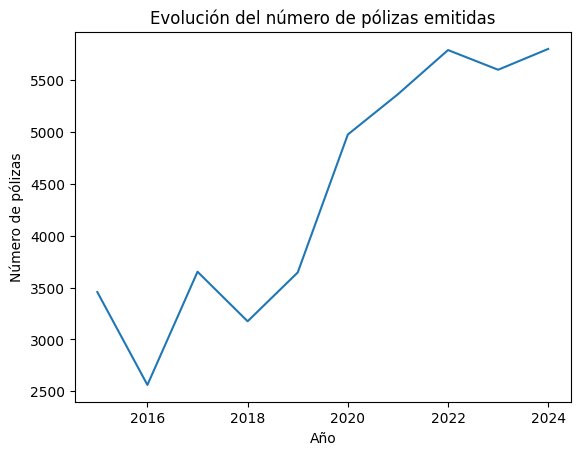

In [ ]:
# Grafica individual para visualizar las suma de las polizas por año
plt.figure()
plt.plot(emision_anual['anio'], emision_anual['polizas'])
plt.xlabel('Año')
plt.ylabel('Número de pólizas')
plt.title('Evolución del número de pólizas emitidas')
plt.show()

La evolución de la prima emitida muestra un crecimiento general del ingreso del portafolio a lo largo del periodo analizado. Tras un incremento inicial entre 2015 y 2016, se observa una ligera disminución en 2017. A partir de este punto, la prima emitida presenta una tendencia de crecimiento sostenido hasta alcanzar su nivel máximo en 2022.

En 2023 se identifica una corrección en el monto de la prima emitida, aunque se mantiene en niveles elevados en comparación con años anteriores. Finalmente, en 2024 se observa una recuperación parcial, lo que sugiere una estabilización del ingreso del portafolio en los años más recientes.

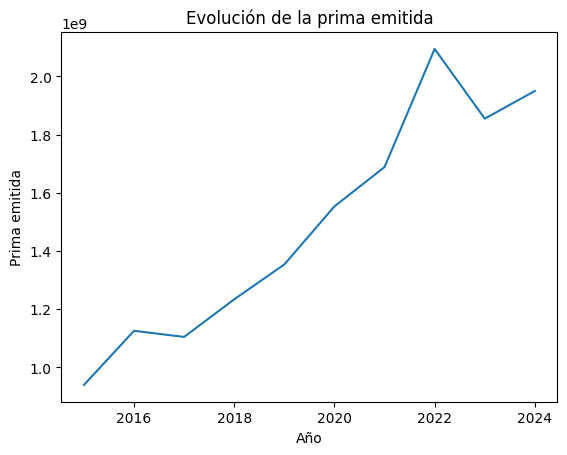

In [ ]:
# Grafica individual para visualizar las suma de la prima emitida por año
plt.figure()
plt.plot(emision_anual['anio'], emision_anual['prima_emitida'])
plt.xlabel('Año')
plt.ylabel('Prima emitida')
plt.title('Evolución de la prima emitida')
plt.show()

La evolución de la suma asegurada evidencia un incremento significativo de la exposición al riesgo del portafolio a lo largo del periodo analizado. Entre 2015 y 2016 se observa un aumento abrupto, seguido de un crecimiento sostenido hasta 2022.

En 2023 se presenta una corrección temporal en la suma asegurada, lo que podría estar asociado a ajustes en la política de riesgo o al contexto económico. Sin embargo, en 2024 se registra un incremento excepcional, alcanzando el nivel más alto del periodo, lo que indica una fuerte expansión en la exposición al riesgo y resalta la necesidad de evaluar su impacto en la siniestralidad y rentabilidad del portafolio.

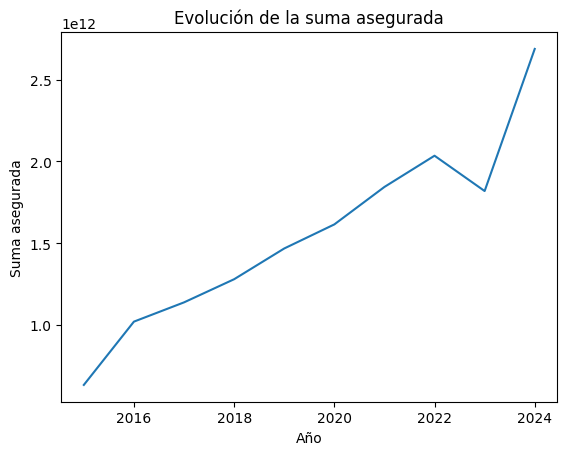

In [45]:
# Grafica individual para visualizar las suma de la suma asegurada por año
plt.figure()
plt.plot(emision_anual['anio'], emision_anual['suma_asegurada'])
plt.xlabel('Año')
plt.ylabel('Suma asegurada')
plt.title('Evolución de la suma asegurada')
plt.show()

## Distribución de la prima por tipo de crédito

La prima emitida se encuentra altamente concentrada en el crédito interno, lo que evidencia una fuerte dependencia del portafolio hacia este segmento. Si bien el crédito mixto aporta una fracción relevante del ingreso, la baja participación del crédito de exportación sugiere una limitada diversificación, lo que podría incrementar la exposición al riesgo ante un deterioro del mercado interno.

In [ ]:
# Variable que muestra el tipo de credito en la prima emitida
emision_tipo = c_emision.groupby('tipo_credito')['prima_emitida'].sum().sort_values(ascending=False)
display(emision_tipo)

tipo_credito
Interno          8635672058
Mixto            4618175266
Exportacion      1603396272
No disponible      44331670
Name: prima_emitida, dtype: int64

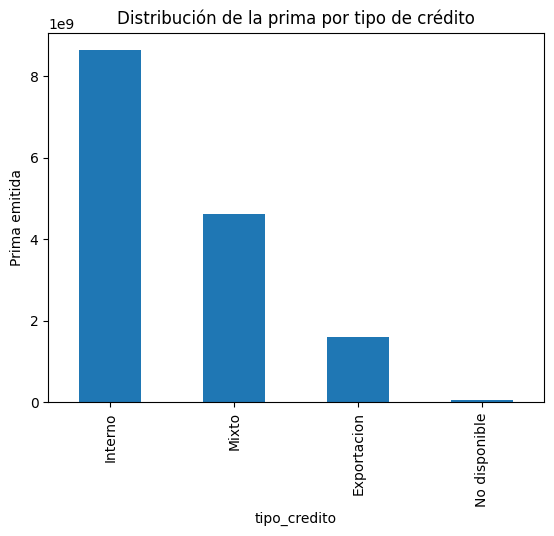

In [49]:
# Grafica para visualizar la distribución de la prima por tipo de credito
plt.figure()
emision_tipo.plot(kind='bar')
plt.ylabel('Prima emitida')
plt.title('Distribución de la prima por tipo de crédito')
plt.show()

## 

El análisis por tipo de insolvencia muestra que la mora prolongada concentra la gran mayoría de los siniestros y del monto siniestrado, lo que indica que el principal riesgo del portafolio se encuentra en el incumplimiento prolongado de los acreditados, más que en procesos formales de insolvencia. No obstante, aunque las insolvencias de hecho y legales son menos frecuentes, presentan una mayor severidad promedio por evento, lo que representa un impacto financiero relevante.

In [53]:
# Agrupa todos los registros según la causa del incumplimiento
siniestros_insolvencia = c_siniestros.groupby('tipo_insolvencia').agg(
    siniestros=('numero_siniestros', 'sum'),
    monto=('monto_siniestro', 'sum')
).sort_values('siniestros', ascending=False)

display(siniestros_insolvencia)

,siniestros,monto
tipo_insolvencia,,
Mora prolongada,32720,6347016089
Insolvencia de hecho,835,474118301
Insolvencia legal,90,49032130


In [54]:
plt.figure()
plt.bar(siniestros_insolvencia['tipo_insolvencia'], siniestros_insolvencia['siniestros'])
plt.title('Número de siniestros por tipo de insolvencia')
plt.xlabel('Tipo de insolvencia')
plt.ylabel('Número de siniestros')
plt.xticks(rotation=20)
plt.show()

KeyError: 'tipo_insolvencia'

<Figure size 640x480 with 0 Axes>

In [33]:
c_siniestros.assign(
    tasa_recuperacion = c_siniestros['monto_recuperacion'] / c_siniestros['monto_siniestro'].replace(0, pd.NA)
)[['tasa_recuperacion']].describe()

,tasa_recuperacion
count,13404.0
unique,293.0
top,-0.0
freq,13106.0


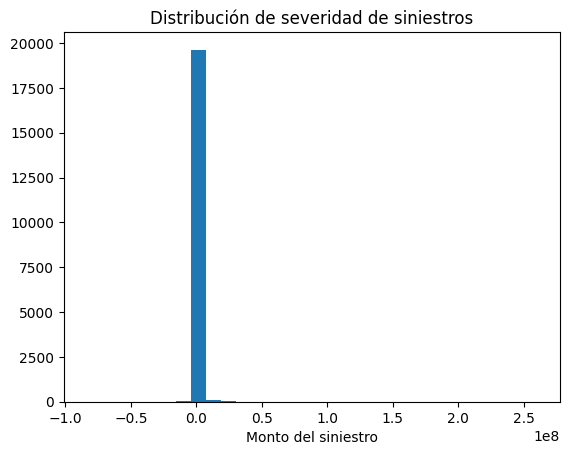

In [35]:
plt.figure()
plt.hist(c_siniestros['monto_siniestro'], bins=30)
plt.xlabel('Monto del siniestro')
plt.title('Distribución de severidad de siniestros')
plt.show()

In [37]:
emision_anual = c_emision.groupby('anio')['prima_emitida'].sum()
siniestros_anual = c_siniestros.groupby('anio')['monto_siniestro'].sum()

siniestralidad = (siniestros_anual / emision_anual).dropna()
display(siniestralidad)

anio
2015    0.662904
2016    0.571442
2017    0.528777
2018    0.614534
2019    0.676949
2020    0.584333
2021    0.276898
2022    0.220788
2023    0.322559
2024    0.465532
dtype: float64

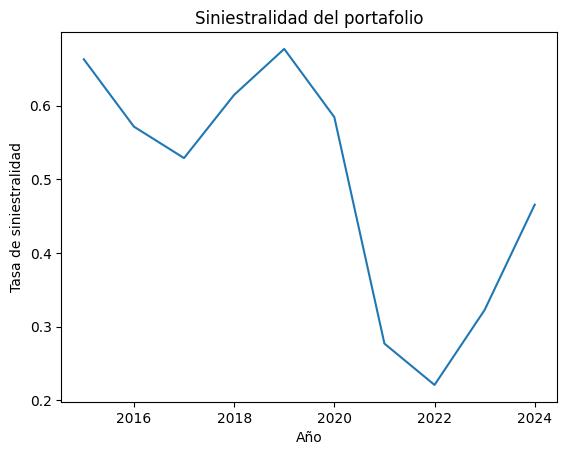

In [38]:
plt.figure()
plt.plot(siniestralidad.index, siniestralidad.values)
plt.xlabel('Año')
plt.ylabel('Tasa de siniestralidad')
plt.title('Siniestralidad del portafolio')
plt.show()